In [1]:
!pip install yellowbrick

In [2]:
pip install gradio==3.50


  Obtaining dependency information for gradio==3.50 from https://files.pythonhosted.org/packages/6c/3c/0d6407c64ac0ecf8986a6c16718325a9d6f89067e418546eb7c7f833f89b/gradio-3.50.0-py3-none-any.whl.metadata
  Using cached gradio-3.50.0-py3-none-any.whl.metadata (17 kB)
  Obtaining dependency information for gradio-client==0.6.1 from https://files.pythonhosted.org/packages/7d/04/e1654ee28fb2686514ca8ae31af5e489403964d48764788f9a168e069c0f/gradio_client-0.6.1-py3-none-any.whl.metadata
  Using cached gradio_client-0.6.1-py3-none-any.whl.metadata (7.1 kB)
Using cached gradio-3.50.0-py3-none-any.whl (20.3 MB)
Using cached gradio_client-0.6.1-py3-none-any.whl (299 kB)
  Attempting uninstall: gradio-client
    Found existing installation: gradio_client 0.11.0
    Uninstalling gradio_client-0.11.0:
      Successfully uninstalled gradio_client-0.11.0
  Attempting uninstall: gradio
    Found existing installation: gradio 4.20.1
    Uninstalling gradio-4.20.1:
      Successfully uninstalled gradio-

In [3]:
!pip show gradio

Name: gradio
Version: 3.50.0
Summary: Python library for easily interacting with trained machine learning models
Home-page: 
Author: 
Author-email: Abubakar Abid <team@gradio.app>, Ali Abid <team@gradio.app>, Ali Abdalla <team@gradio.app>, Dawood Khan <team@gradio.app>, Ahsen Khaliq <team@gradio.app>, Pete Allen <team@gradio.app>, Ömer Faruk Özdemir <team@gradio.app>
License: 
Location: C:\Users\User\anaconda3\Lib\site-packages
Requires: aiofiles, altair, fastapi, ffmpy, gradio-client, httpx, huggingface-hub, importlib-resources, jinja2, markupsafe, matplotlib, numpy, orjson, packaging, pandas, pillow, pydantic, pydub, python-multipart, pyyaml, requests, semantic-version, typing-extensions, uvicorn, websockets
Required-by: 


## Importando blibliotecas

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import gradio as gr
from yellowbrick.cluster import KElbowVisualizer

## Carregar os dados do arquivo CSV

In [6]:
data = pd.read_csv('data-final.csv', sep='\t')

## Verificando o dataset

In [7]:
data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0


## Remover colunas desnecessárias

In [8]:
data.drop(data.columns[50:110], axis=1, inplace=True)

## Filtrar apenas valores positivos

In [9]:
data = data[(data > 0.00).all(axis=1)]

## Normalizar os dados

In [10]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

## Verificando novamente os dados

In [12]:
data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0


## Redução de dimensionalidade com PCA

In [13]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

In [14]:
data["EXT1"].value_counts()

EXT1
3.0    247835
1.0    216949
2.0    176207
4.0    166599
5.0     66844
Name: count, dtype: int64

## Encontrar o número ideal de clusters usando o gráfico de cotovelo

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_k

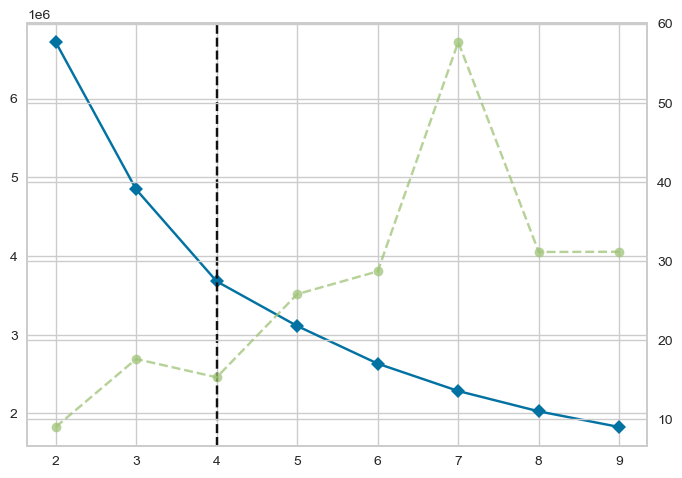

In [15]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2, 10))
visualizer.fit(data_pca)
k_optimal = visualizer.elbow_value_

## Treinar o modelo KMeans com o número ótimo de clusters

In [16]:
kmeans = KMeans(n_clusters=k_optimal, n_init=10)
k_fit = kmeans.fit(data_scaled)

## Adicionar os rótulos dos clusters aos dados originais

In [17]:
data['Clusters'] = k_fit.labels_

## Criar um DataFrame com as médias dos traços de personalidade por cluster

In [18]:
data_clusters = data.groupby('Clusters').mean()

In [19]:
data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,Clusters
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,1
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,1
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,0
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,1


## Analisando os grupos

In [20]:
data["Clusters"].value_counts()

Clusters
0    247065
1    245839
3    205615
2    175915
Name: count, dtype: int64

## Agrupando os registros por grupos

In [21]:
data.groupby('Clusters').mean()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
Clusters,,,,,,,,,,,,,,,,,,,,,
0,1.913088,3.529658,2.522939,3.977322,2.528173,3.078603,1.913930,4.088369,2.195277,4.412733,...,3.453071,2.419040,3.991808,2.171659,3.436213,2.118034,3.711736,3.035035,4.303471,3.662239
1,3.070774,2.348098,4.061406,2.638621,3.945176,1.931122,3.412217,3.193769,3.334032,2.996530,...,3.837369,1.817730,4.019387,1.849824,4.084039,1.731666,4.298630,3.162082,4.164901,4.182502
2,2.112208,3.468454,2.681875,3.627462,2.554131,2.923429,2.071944,3.746895,2.616934,4.034238,...,3.699923,2.023142,3.777080,2.109451,3.756257,2.097030,4.047756,3.298940,3.907006,3.804707
3,3.474173,1.874173,3.847783,2.434545,4.083583,1.745106,3.672582,2.709715,3.808273,2.923605,...,3.845400,1.994563,4.326265,1.860472,4.038314,1.675821,4.043139,3.449661,4.226856,4.286429


In [22]:
predicoes = k_fit.labels_

## Calculando a média de cada grupo de questões para verificar um padrão e selecionando as colunas de cada grupo.

In [23]:
col_list = list(data)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

## Somando os valores de cada grupo

In [24]:
data_soma = pd.DataFrame()
data_soma['extroversion'] = data[ext].sum(axis=1)/10
data_soma['neurotic'] = data[est].sum(axis=1)/10
data_soma['agreeable'] = data[agr].sum(axis=1)/10
data_soma['conscientious'] = data[csn].sum(axis=1)/10
data_soma['open'] = data[opn].sum(axis=1)/10
data_soma['clusters'] = predicoes

## Valor médio por grupo

In [25]:
data_soma.groupby('clusters').mean()

,extroversion,neurotic,agreeable,conscientious,open
clusters,,,,,
0,3.016009,3.519808,3.210724,3.194319,3.230231
1,3.093174,2.503661,3.211635,3.137513,3.314813
2,2.983757,2.787738,2.936931,3.048239,3.252129
3,3.057354,3.337052,3.296622,3.184343,3.374692


## Média dos grupos

In [26]:
data_clusters = data_soma.groupby('clusters').mean()

## Visualização dos resultados

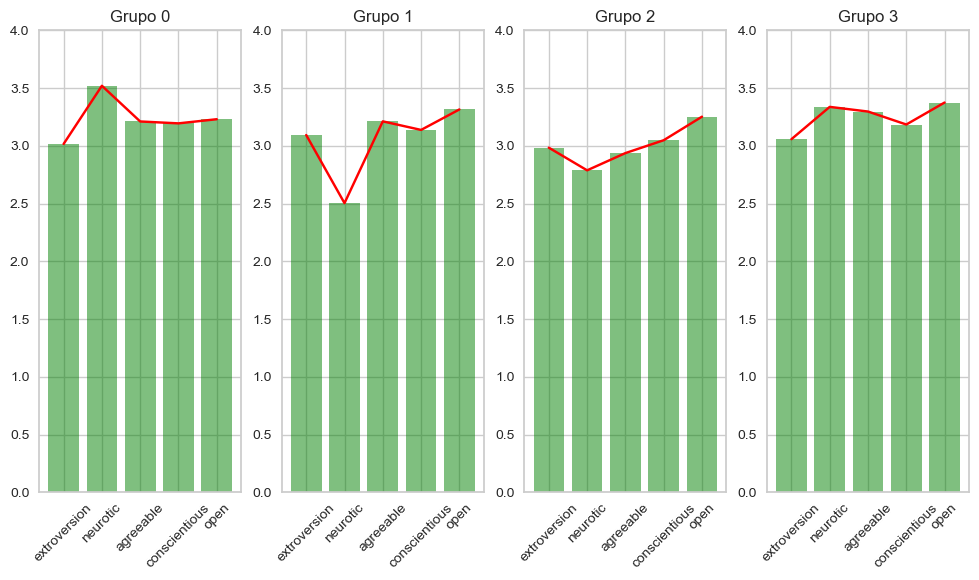

In [27]:
plt.figure(figsize=(12, 6))
for i in range(k_optimal):
    plt.subplot(1, k_optimal, i + 1)
    plt.bar(data_clusters.columns, data_clusters.iloc[i], color='green', alpha=0.5)
    plt.plot(data_clusters.columns, data_clusters.iloc[i], color='red')
    plt.title(f'Grupo {i}')
    plt.xticks(rotation=45)
    plt.ylim(0, 4)

In [28]:
data[:0].to_excel("perguntas.xlsx",index=False)

In [29]:
meus_dados = pd.read_excel('perguntas.xlsx')

## Importando questões

In [30]:
dicio_questions = open("questions.txt").read().split("\n")
dicio_questions

['EXT1\tI am the life of the party.',
 "EXT2\tI don't talk a lot.",
 'EXT3\tI feel comfortable around people.',
 'EXT4\tI keep in the background.',
 'EXT5\tI start conversations.',
 'EXT6\tI have little to say.',
 'EXT7\tI talk to a lot of different people at parties.',
 "EXT8\tI don't like to draw attention to myself.",
 "EXT9\tI don't mind being the center of attention.",
 'EXT10\tI am quiet around strangers.',
 'EST1\tI get stressed out easily.',
 'EST2\tI am relaxed most of the time.',
 'EST3\tI worry about things.',
 'EST4\tI seldom feel blue.',
 'EST5\tI am easily disturbed.',
 'EST6\tI get upset easily.',
 'EST7\tI change my mood a lot.',
 'EST8\tI have frequent mood swings.',
 'EST9\tI get irritated easily.',
 'EST10\tI often feel blue.',
 'AGR1\tI feel little concern for others.',
 'AGR2\tI am interested in people.',
 'AGR3\tI insult people.',
 "AGR4\tI sympathize with others' feelings.",
 "AGR5\tI am not interested in other people's problems.",
 'AGR6\tI have a soft heart.',


In [31]:
questions = []
for q in dicio_questions:
  q = str(q)
  questions.append(q[q.find("\t"):].lstrip())

In [32]:
questions

['I am the life of the party.',
 "I don't talk a lot.",
 'I feel comfortable around people.',
 'I keep in the background.',
 'I start conversations.',
 'I have little to say.',
 'I talk to a lot of different people at parties.',
 "I don't like to draw attention to myself.",
 "I don't mind being the center of attention.",
 'I am quiet around strangers.',
 'I get stressed out easily.',
 'I am relaxed most of the time.',
 'I worry about things.',
 'I seldom feel blue.',
 'I am easily disturbed.',
 'I get upset easily.',
 'I change my mood a lot.',
 'I have frequent mood swings.',
 'I get irritated easily.',
 'I often feel blue.',
 'I feel little concern for others.',
 'I am interested in people.',
 'I insult people.',
 "I sympathize with others' feelings.",
 "I am not interested in other people's problems.",
 'I have a soft heart.',
 'I am not really interested in others.',
 'I take time out for others.',
 "I feel others' emotions.",
 'I make people feel at ease.',
 'I am always prepared.

## Inpus do gradio

In [33]:
inputs_questions = []
for q in questions:
  obj_input = gr.inputs.Slider(minimum=1,maximum=5,step=1,default=3,label=q)
  inputs_questions.append(obj_input)

C:\Users\User\AppData\Local\Temp\ipykernel_4040\123639327.py:3: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  obj_input = gr.inputs.Slider(minimum=1,maximum=5,step=1,default=3,label=q)
C:\Users\User\AppData\Local\Temp\ipykernel_4040\123639327.py:3: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  obj_input = gr.inputs.Slider(minimum=1,maximum=5,step=1,default=3,label=q)


## Interface interativa com gradio

In [34]:
inputs_questions

[slider,
 slider,
 slider,
 slider,
 slider,
 slider,
 slider,
 slider,
 slider,
 slider,
 slider,
 slider,
 slider,
 slider,
 slider,
 slider,
 slider,
 slider,
 slider,
 slider,
 slider,
 slider,
 slider,
 slider,
 slider,
 slider,
 slider,
 slider,
 slider,
 slider,
 slider,
 slider,
 slider,
 slider,
 slider,
 slider,
 slider,
 slider,
 slider,
 slider,
 slider,
 slider,
 slider,
 slider,
 slider,
 slider,
 slider,
 slider,
 slider,
 slider]

In [35]:
def predict(*outputs_questions):
    outputs_questions = np.array(outputs_questions).reshape(1, -1)
    return k_fit.predict(outputs_questions)[0]

iface = gr.Interface(
    fn=predict,
    title="Big Five Personality",
    description="Sistema para detecção de traços de personalidade.",
    inputs=inputs_questions,
    outputs="text"
)
iface.launch(share=True)

Running on local URL:  http://127.0.0.1:7860

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.
